In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)
from config.config import *
from libs.common import *

c:\Users\Admin\Data\ads_fraud_detection
c:/Users/Admin/Data/ads_fraud_detection


In [2]:
# tf.keras.losses.Dice(
#     reduction='sum_over_batch_size', name='dice'
# )

# tf.keras.losses.binary_focal_crossentropy(
#     y_true,
#     y_pred,
#     apply_class_balancing=False,
#     alpha=0.25,
#     gamma=2.0,
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1
# )

# tf.keras.losses.categorical_focal_crossentropy(
#     y_true,
#     y_pred,
#     alpha=0.25,
#     gamma=2.0,
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1
# )

# keras_cv.losses.FocalLoss(
#     alpha=0.25, gamma=2, from_logits=False, label_smoothing=0, **kwargs
# )

In [3]:
save_dir=f"{exps_dir}/exp2/exp_smote"
if os.path.exists(save_dir) == False: 
  os.makedirs(save_dir, exist_ok=True)



test_size=0.33
seed=42

In [4]:
feature_selection=dict(np.load(f'{save_dir}/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['Age',
  'AgeOfPolicyHolder',
  'AgentType',
  'BasePolicy',
  'Fault',
  'MaritalStatus',
  'PoliceReportFiled',
  'PolicyType',
  'VehicleCategory',
  'WitnessPresent'],
 'LDA': ['AccidentArea',
  'AddressChange_Claim',
  'Age',
  'AgeOfPolicyHolder',
  'BasePolicy',
  'Fault',
  'MaritalStatus',
  'NumberOfCars',
  'PoliceReportFiled',
  'VehicleCategory'],
 'DTC': ['Age',
  'AgeOfVehicle',
  'BasePolicy',
  'Fault',
  'Make',
  'PastNumberOfClaims',
  'PolicyNumber',
  'RepNumber',
  'week_claimed',
  'week_incident'],
 'RD': ['Age',
  'AgeOfVehicle',
  'BasePolicy',
  'Fault',
  'Make',
  'PolicyNumber',
  'PolicyType',
  'VehicleCategory',
  'week_claimed',
  'week_incident'],
 'LGBM': ['Age',
  'AgeOfPolicyHolder',
  'AgeOfVehicle',
  'Make',
  'Month',
  'PolicyNumber',
  'RepNumber',
  'VehiclePrice',
  'week_claimed',
  'week_incident'],
 'XGB': ['Age',
  'AgeOfPolicyHolder',
  'AgeOfVehicle',
  'BasePolicy',
  'Deductible',
  'Fault',
  'Make',
  'MaritalStatus',
  '

* kiểm tra và tạo các thư mục (nếu chưa có)
* tập test 33%

# 5. Xây dựng và đánh giá mô hình học sâu Neutual Network

In [5]:
# bg_model=joblib.load(f'{save_dir}/bg_model.joblib')
# rf_model=joblib.load(f'{save_dir}/rf_model.joblib')
# svm_model=joblib.load(f'{save_dir}/svm_model.joblib')

In [6]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{save_dir}/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.5317035512094699, 1: 8.385551948051948}

In [7]:


# Dữ liệu label đã được mã hóa
def oneHot(arr):
    labels = np.array(arr)
    encoder = OneHotEncoder(sparse=False)
    
    labels_reshaped = labels.reshape(-1, 1)
    
    encoder.fit(labels_reshaped)
    
    onehot_labels = encoder.transform(labels_reshaped)
    # onehot_labels=pd.DataFrame(onehot_labels)
    return onehot_labels

y_train_onehot=oneHot(y_train)
y_test_onehot=oneHot(y_test)
print(y_test_onehot.shape,y_train_onehot.shape)


(5089, 2) (19430, 2)


In [8]:
y_test_onehot.reshape(-1, 1)
print(y_test_onehot.shape)

(5089, 2)


In [9]:
x_test.shape

(5089, 34)

In [10]:
x_train.shape

(19430, 34)

In [11]:
def f1_score(y_true, y_pred):
    """
    Macro F1 score metric.
    """
    y_pred = K.round(y_pred)    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
    false_positives = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=0)
    false_negatives = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=0)    
    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())    
    f1_scores = 2 * (precision * recall) / (precision + recall + K.epsilon())    
    macro_f1_score = K.mean(f1_scores)
    
    return macro_f1_score

In [12]:
print(x_train.shape[1])

34


#### * Xây dựng model:

#### * Xây dựng Stacked_model:

In [13]:
def f1_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Calculate true positives, predicted positives, and possible positives for each class
    tp = tf.reduce_sum(y_true * y_pred, axis=0)
    predicted_positives = tf.reduce_sum(y_pred, axis=0)
    possible_positives = tf.reduce_sum(y_true, axis=0)
    
    # Calculate precision and recall for each class
    precision = tp / (predicted_positives + tf.keras.backend.epsilon())
    recall = tp / (possible_positives + tf.keras.backend.epsilon())
    
    # Calculate F1 score for each class
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    
    # Calculate the macro F1 score
    f1_macro = tf.reduce_mean(f1)
    
    # Return the F1 loss
    return 1 - f1_macro

In [ ]:
from tensorflow.keras import regularizers
from tabnet_keras.models import TabNetClassifier

# Định nghĩa tham số regularization
l2_reg = 0.01

learning_rate=0.1
tabnet_params = {
    "decision_dim": 16,
    "attention_dim": 16,
    "n_steps": 3,
    "n_shared_glus": 2,
    "n_dependent_glus": 2,
    "relaxation_factor": 1.3,
    "epsilon": 1e-15,
    "momentum": 0.98,
    "mask_type": "softmax", # can be 'sparsemax' or 'softmax'
    "lambda_sparse": 1e-3, 
    "virtual_batch_splits": 8 #number of splits for ghost batch normalization, ideally should evenly divide the batch_size
}



### Classification
model = TabNetClassifier(n_classes = 2, out_activation = 'softmax', **tabnet_params)
tabnet_model = TabNetClassifier(n_classes = 2, out_activation = 'softmax', **tabnet_params)
# model = TabNetClassifier(n_classes = 2, out_activation = 'softmax', 
#     kernel_regularizer=l2(0.01), **tabnet_params)
# model.compile(loss = 'categorical_crossentropy', optimizer = )
# model.fit(x_train, y_train, epochs = 100, batch_size = 1024)
# model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))



tabnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss=tf.keras.losses.categorical_focal_crossentropy, metrics=['accuracy',f1_score])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss=tf.keras.losses.categorical_focal_crossentropy, metrics=['accuracy',f1_score])
# model.compile(optimizer=Adam(lr=learning_rate), loss=f1_loss, metrics=['accuracy',,f1_score])
# model.compile(optimizer=Adam(lr=learning_rate), loss=focal_loss, metrics=['accuracy',,f1_score])
# model.compile(optimizer=Adam(lr=learning_rate), loss=dice_coef_9cat_loss, metrics=['accuracy',,f1_score])
early_stopping = EarlyStopping(monitor='val_loss',
    min_delta=0.00005,
    patience=70,
    verbose=1,
    restore_best_weights=True,
)

# checkpointer = ModelCheckpoint(filepath = "Emotion_weights.hdf5",monitor='val_loss', verbose = 1, save_best_only=True)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=30,
    min_lr=0.000001,
    verbose=1,
)


In [15]:
tabnet_model.build(input_shape=(None, 34))
dummy_input = tf.random.normal((1, 34)) 
tabnet_model(dummy_input)

tabnet_model.load_weights('weights/tabnet_focal.h5')
tabnet_model.summary()



Model: "tab_net_classifier_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_net_encoder_1 (TabNetE  multiple                  26880     
 ncoder)                                                         
                                                                 
 classifier (Dense)          multiple                  32        
                                                                 
Total params: 26912 (105.12 KB)
Trainable params: 24592 (96.06 KB)
Non-trainable params: 2320 (9.06 KB)
_________________________________________________________________


In [16]:
def tabnet_feature(model,input_shape=(34), proba=False):
    input = Input(shape=input_shape)
    feature = tabnet_model.get_layer('tab_net_encoder_1')(input)
    probability=tabnet_model.get_layer('classifier')(feature)
    if proba:
        output=Concatenate()([feature,probability])
    else:
        output=feature
    model = Model(inputs=input,outputs=[output])
    return model
tabnet_model=tabnet_feature(tabnet_model, proba=True)
# output=feat_model(dummy_input)
# print(output.shape)

In [17]:
rf1_model=RandomForestClassifier(n_estimators=100, random_state=seed)
# bg1_model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=seed)
# svm_model=SVC(kernel='rbf',probability=True, gamma='scale' , random_state=seed)
logi_model=LogisticRegression(random_state=seed)
lda_model=LinearDiscriminantAnalysis()
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4,random_state=seed)
rf_model=RandomForestClassifier(n_estimators=100, random_state=seed, )
knn_model=KNeighborsClassifier(n_neighbors=100)
gau_model=GaussianNB()
svm_model=SVC(kernel='rbf', gamma='scale', random_state=seed)
mlp_model=MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=seed)
gb_model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
lgbm=LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=seed)  # Mô hình LightGBM
xgb=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=seed, use_label_encoder=False, eval_metric='mlogloss')  # Mô hình XGBoost# Lặp qua từng mô hình và vẽ đường cong ROC

# # Huấn luyện các mô hình cơ sở
rf1_model.fit(x_train[feature_selection['RD']], y_train)
logi_model.fit(x_train[feature_selection['LR']], y_train)
lda_model.fit(x_train[feature_selection['LDA']], y_train)
dt_model.fit(x_train[feature_selection['DTC']], y_train)
lgbm.fit(x_train[feature_selection['LGBM']], y_train)
xgb.fit(x_train[feature_selection['XGB']], y_train)
# bg_model.fit(x_train, y_train)
# svm_model.fit(x_train, y_train)


# Dự đoán đầu ra của các mô hình cơ sở
rf_pred = rf1_model.predict_proba(x_train[feature_selection['RD']])
logi_pred = logi_model.predict_proba(x_train[feature_selection['LR']])
lda_pred = lda_model.predict_proba(x_train[feature_selection['LDA']])
dt_pred = dt_model.predict_proba(x_train[feature_selection['DTC']])
lgbm_pred = lgbm.predict_proba(x_train[feature_selection['LGBM']])
xgb_pred = xgb.predict_proba(x_train[feature_selection['XGB']])
tabnet_pred=tabnet_model.predict(x_train)



# keras_pred = tabnet.predict(x_test)
stacked_input = np.column_stack((rf_pred,logi_pred,lda_pred,dt_pred,lgbm_pred,xgb_pred, tabnet_pred))

rf_pred = rf1_model.predict_proba(x_test[feature_selection['RD']])
logi_pred = logi_model.predict_proba(x_test[feature_selection['LR']])
lda_pred = lda_model.predict_proba(x_test[feature_selection['LDA']])
dt_pred = dt_model.predict_proba(x_test[feature_selection['DTC']])
lgbm_pred = lgbm.predict_proba(x_test[feature_selection['LGBM']])
xgb_pred = xgb.predict_proba(x_test[feature_selection['XGB']])
tabnet_pred=tabnet_model.predict(x_test)



# keras_pred = tabnet.predict(x_test)
stacked_input_test = np.column_stack((rf_pred,logi_pred,lda_pred,dt_pred,lgbm_pred,xgb_pred, tabnet_pred))

[LightGBM] [Info] Number of positive: 9715, number of negative: 9715
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1089
[LightGBM] [Info] Number of data points in the train set: 19430, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
160/160 [==============================] - 0s 1ms/step


In [18]:
y_train_onehot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [19]:
class_weights_dict

{0: 0.5317035512094699, 1: 8.385551948051948}

In [20]:
model.fit(x=stacked_input, y=y_train_onehot,
          validation_data=(stacked_input_test, y_test_onehot),
          batch_size=32,
          epochs=1200,
          callbacks=[early_stopping, lr_scheduler], class_weight=class_weights_dict)

Epoch 1/1200
608/608 [==============================] - 45s 15ms/step - loss: 0.0209 - accuracy: 0.9058 - f1_score: 0.8957 - val_loss: 0.1929 - val_accuracy: 0.6691 - val_f1_score: 0.4883 - lr: 0.1000
Epoch 2/1200
608/608 [==============================] - 9s 15ms/step - loss: 0.0063 - accuracy: 0.9714 - f1_score: 0.9700 - val_loss: 0.3042 - val_accuracy: 0.4341 - val_f1_score: 0.3475 - lr: 0.1000
Epoch 3/1200
608/608 [==============================] - 9s 15ms/step - loss: 0.0042 - accuracy: 0.9757 - f1_score: 0.9715 - val_loss: 0.3850 - val_accuracy: 0.6119 - val_f1_score: 0.4489 - lr: 0.1000
Epoch 4/1200
608/608 [==============================] - 9s 15ms/step - loss: 0.0061 - accuracy: 0.9713 - f1_score: 0.9633 - val_loss: 0.3389 - val_accuracy: 0.5408 - val_f1_score: 0.2804 - lr: 0.1000
Epoch 5/1200
608/608 [==============================] - 9s 15ms/step - loss: 0.0059 - accuracy: 0.9769 - f1_score: 0.9742 - val_loss: 0.1890 - val_accuracy: 0.5105 - val_f1_score: 0.3978 - lr: 0.1000

In [21]:
model.summary()

Model: "tab_net_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_net_encoder (TabNetEnc  multiple                  26368     
 oder)                                                           
                                                                 
 classifier (Dense)          multiple                  32        
                                                                 
Total params: 26400 (103.12 KB)
Trainable params: 24112 (94.19 KB)
Non-trainable params: 2288 (8.94 KB)
_________________________________________________________________


#### * Kết quả đánh giá mô hình:

In [22]:
model.summary()

Model: "tab_net_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_net_encoder (TabNetEnc  multiple                  26368     
 oder)                                                           
                                                                 
 classifier (Dense)          multiple                  32        
                                                                 
Total params: 26400 (103.12 KB)
Trainable params: 24112 (94.19 KB)
Non-trainable params: 2288 (8.94 KB)
_________________________________________________________________


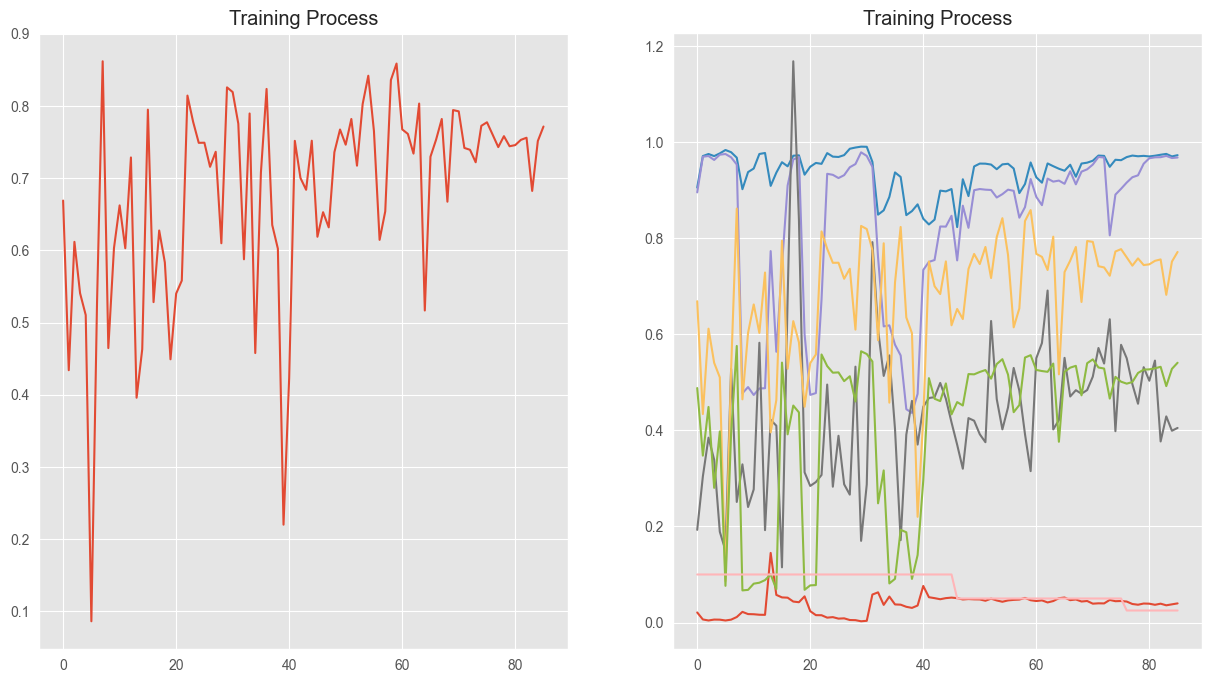

<Figure size 640x480 with 0 Axes>

In [23]:
history=model.history.history
fig,axes=plt.subplots(1,2, figsize=(15,8))
axes[0].plot(pd.DataFrame(history['val_accuracy']))
axes[0].set_title('Training Process')
axes[1].plot(pd.DataFrame(history))
axes[1].set_title('Training Process')
plt.show()
plt.savefig('train.png')

In [24]:
y_test_labels = np.argmax(y_test_onehot, axis=1)
predictions = model.predict(stacked_input_test)
predictions = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test_labels, predictions)
accuracy


160/160 [==============================] - 1s 1ms/step


0.7950481430536451

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

y_test_labels = np.argmax(y_test_onehot, axis=1)

accuracy = accuracy_score(y_test_labels, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_labels, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, predictions))


Accuracy: 0.7950481430536451
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      4782
           1       0.15      0.52      0.23       307

    accuracy                           0.80      5089
   macro avg       0.56      0.67      0.56      5089
weighted avg       0.91      0.80      0.84      5089

Confusion Matrix:
[[3887  895]
 [ 148  159]]


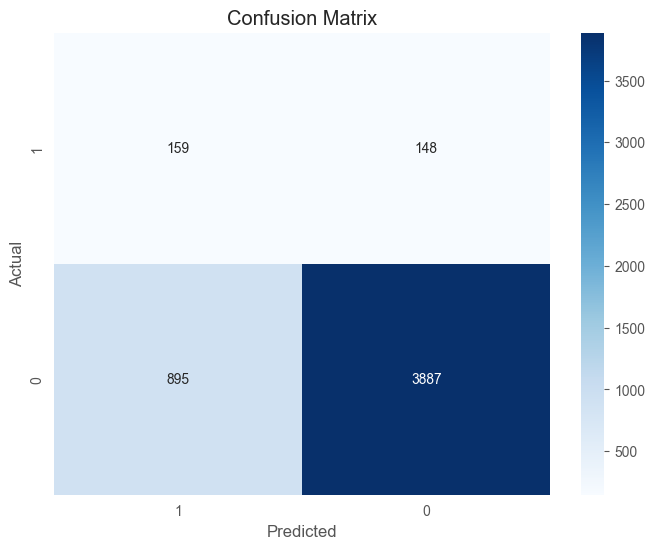

In [26]:
# Dự đoán


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, predictions,labels=[1,0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[1,0], yticklabels=[1,0])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

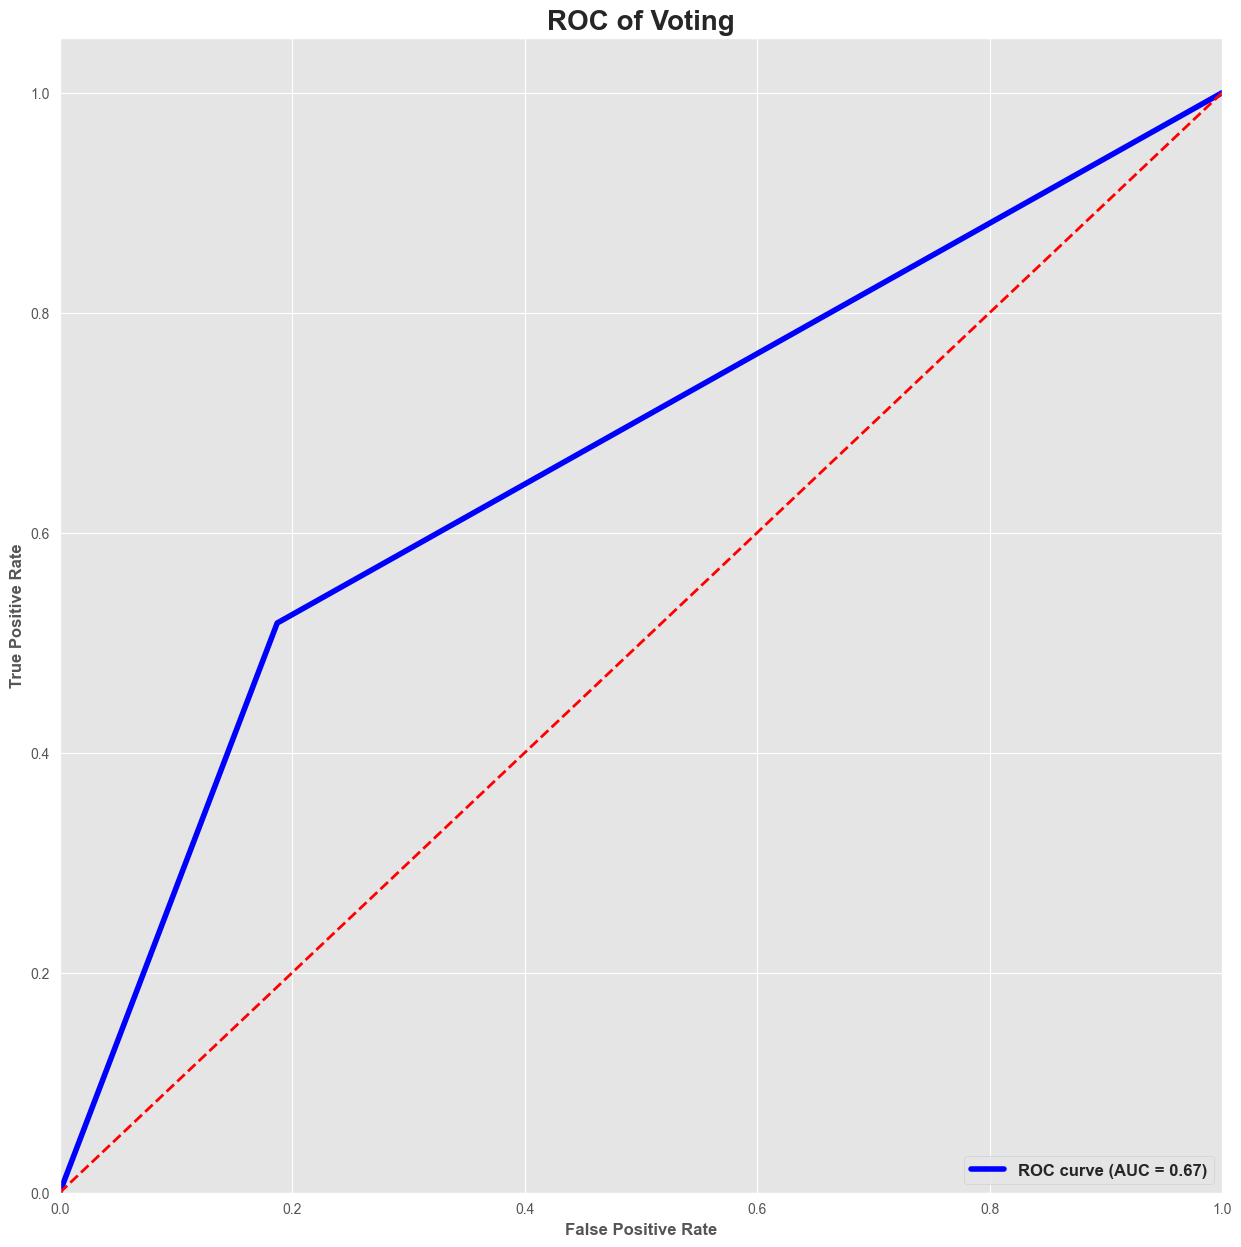

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

fpr, tpr, _ = roc_curve(y_test, predictions)
    
roc_auc = auc(fpr, tpr)

ax.plot(fpr, tpr, lw=4, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, weight='bold')  
ax.set_ylabel('True Positive Rate', fontsize=12, weight='bold')   
ax.set_title(f'ROC of Voting',fontsize=20, weight='bold')  
ax.legend(loc="lower right", prop={'size': 12, 'weight': 'bold'}) 
plt.show()

In [28]:
model.save_weights('tabnet_focal.h5')


In [29]:
def check_result(prediction):
    prediction = (prediction > 0.2).astype(int)
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [30]:
# solandung=0
# hopdonggianlan=0
# for indx in range(len(x_test)):
#     y_predict = stacked_model.predict(stacked_input)
#     stacked_pred_labels = y_predict.argmax(axis=1)

#     #print(y_predict[0][0])
#     Y_check = check_result(y_test.iloc[indx])
#     print('True:', Y_check)
#     print('Predicted:', check_result(stacked_pred_labels[indx]))
#     print("----------------------------")
#     if Y_check==check_result(stacked_pred_labels[indx]):
#         solandung+=1
#         if Y_check=='Y':
#             hopdonggianlan+=1
    

In [31]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số hợp đồng gian lận trong lần kiểm tra: {hopdonggianlan} chiếm khoảng {(hopdonggianlan/len(y_test[y_test['fraud_reported']==1]))*100}% so với thực tế")


NameError: name 'solandung' is not defined